# Moving Average model

In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
using NamedArrays
using CSV
using DataFrames

# Load the data file (ref: Boyd/263)
raw = CSV.read(joinpath(@__DIR__, "uy_data.csv"), DataFrame)
u = raw[:,1];
y = raw[:,2];
T = length(u)

99

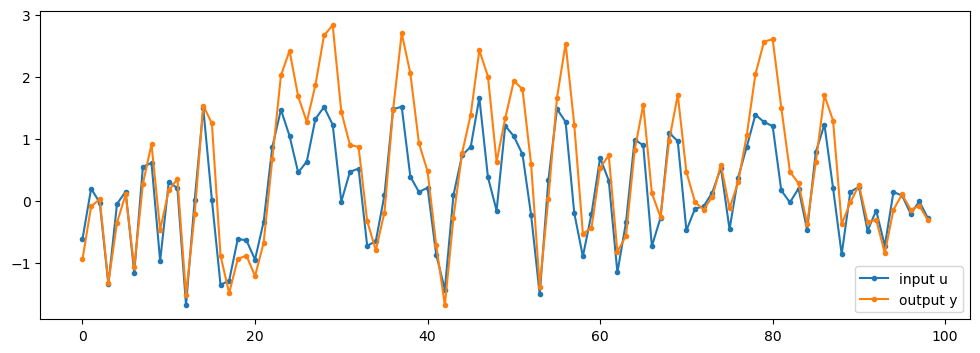

In [3]:
# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");


2.384566188842658


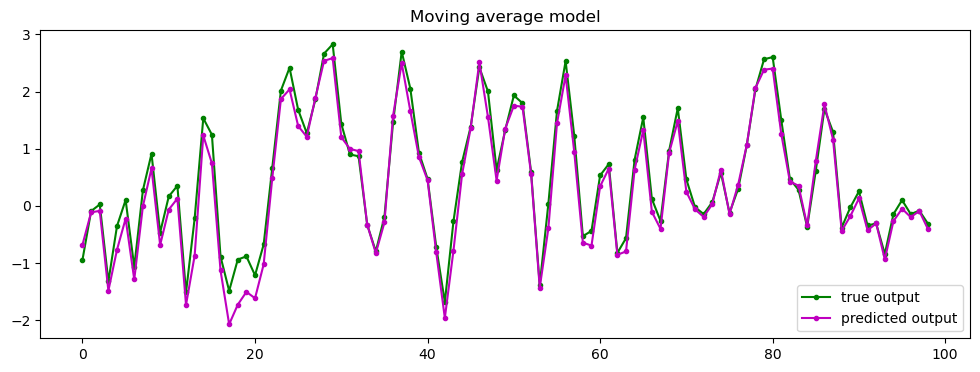

In [4]:
using LinearAlgebra

# generate A matrix. Using more width creates better fit.  (MA model)
width = 10
A = zeros(T,width)
for i = 1:width
    A[i:end,i] = u[1:end-i+1]
end
wopt = A\y
yest = A*wopt

figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Moving average model");
println()
println(norm(yest-y))

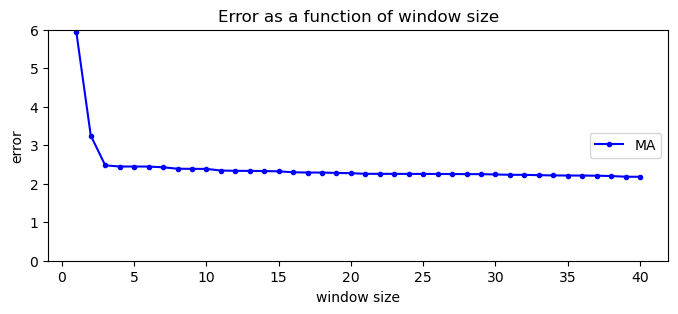

In [5]:
# compute the error that the moving average model makes
MaxWidth = 40
errMA = zeros(MaxWidth)
for width = 1:MaxWidth
    AMA = zeros(T,width)
    for i = 1:width
        AMA[i:end,i] = u[1:end-i+1]
    end
    wMA = AMA\y
    yMAest = AMA*wMA
    errMA[width] = norm(y-yMAest)
end
figure(figsize=(8,3))
title("Error as a function of window size")
plot(1:MaxWidth,errMA,"b.-")
xlabel("window size")
ylabel("error")
legend(["MA"],loc="right",fontsize=10)
ylim([0,6])
;